# 🧠 Anomaly Detection in Credit Card Transactions
### 🎯 Goal: Use unsupervised learning to detect fraudulent transactions without labeled data

Dataset: [Credit Card Fraud Detection on Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

## Importing Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import OneClassSVM



## Load The Dataset

In [6]:
data = pd.read_csv('./data/creditcard.csv')

## EDA

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
data[["Amount","Time"]].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,88.349619,94813.859575
std,250.120109,47488.145955
min,0.000000,0.000000
25%,5.600000,54201.500000
50%,22.000000,84692.000000
75%,77.165000,139320.500000
max,25691.160000,172792.000000


## Visualization

### Transaction Amount Distribution

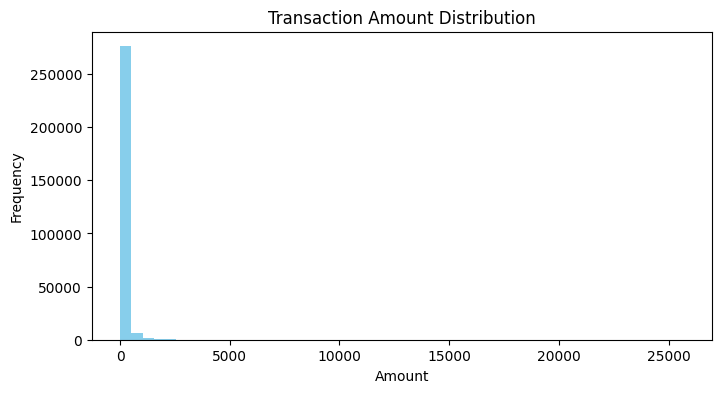

In [13]:
plt.figure(figsize=(8,4))
plt.hist(data['Amount'], bins=50, color='skyblue')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


### Transaction Time Distribution

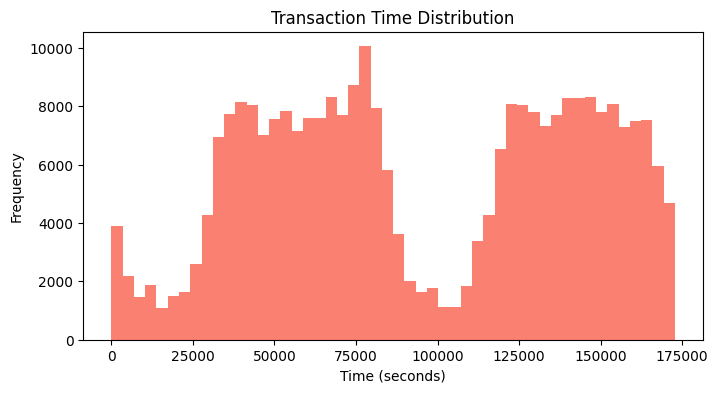

In [14]:
plt.figure(figsize=(8,4))
plt.hist(data['Time'], bins=50, color='salmon')
plt.title("Transaction Time Distribution")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()

### Distribution of Feature V1

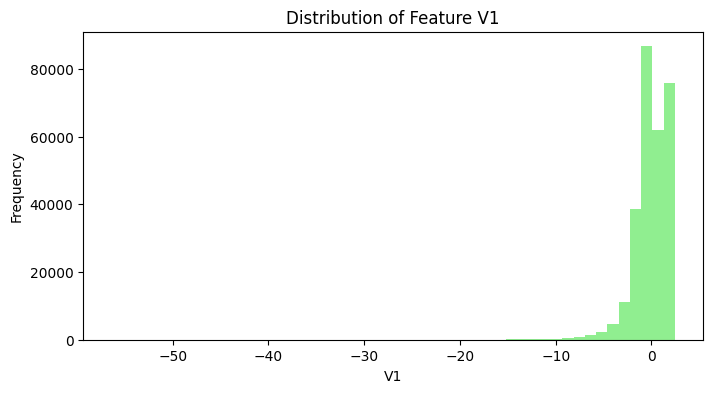

In [15]:
plt.figure(figsize=(8,4))
plt.hist(data['V1'], bins=50, color='lightgreen')
plt.title("Distribution of Feature V1")
plt.xlabel("V1")
plt.ylabel("Frequency")
plt.show()

### Transaction Amounts: Fraud vs Non-Fraud

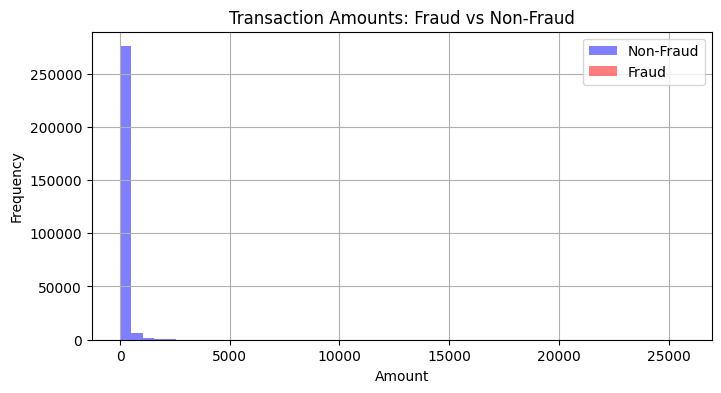

In [16]:
plt.figure(figsize=(8,4))
data[data['Class'] == 0]['Amount'].hist(bins=50, alpha=0.5, label='Non-Fraud', color='blue')
data[data['Class'] == 1]['Amount'].hist(bins=50, alpha=0.5, label='Fraud', color='red')
plt.legend()
plt.title("Transaction Amounts: Fraud vs Non-Fraud")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

### V1 Feature Distribution: Fraud vs Non-Fraud

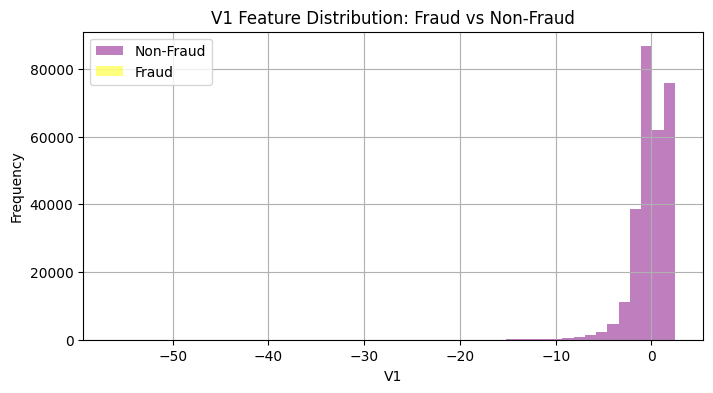

In [17]:
plt.figure(figsize=(8,4))
data[data['Class'] == 0]['V1'].hist(bins=50, alpha=0.5, label='Non-Fraud', color='purple')
data[data['Class'] == 1]['V1'].hist(bins=50, alpha=0.5, label='Fraud', color='yellow')
plt.legend()
plt.title("V1 Feature Distribution: Fraud vs Non-Fraud")
plt.xlabel("V1")
plt.ylabel("Frequency")
plt.show()

### V2 Feature Distribution: Fraud vs Non-Fraud

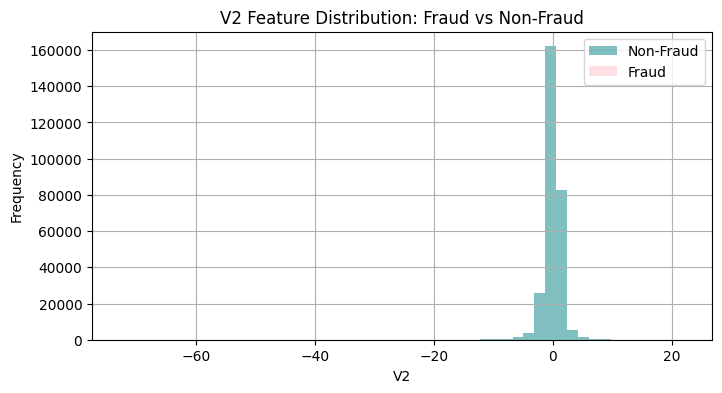

In [18]:
plt.figure(figsize=(8,4))
data[data['Class'] == 0]['V2'].hist(bins=50, alpha=0.5, label='Non-Fraud', color='teal')
data[data['Class'] == 1]['V2'].hist(bins=50, alpha=0.5, label='Fraud', color='pink')
plt.legend()
plt.title("V2 Feature Distribution: Fraud vs Non-Fraud")
plt.xlabel("V2")
plt.ylabel("Frequency")
plt.show()

### Transaction Times: Fraud vs Non-Fraud

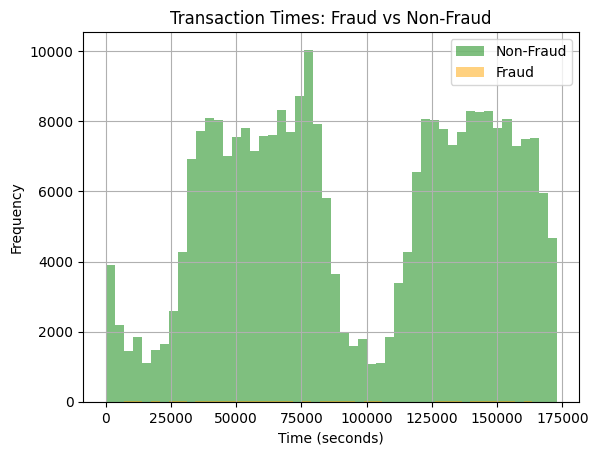

In [19]:
data[data['Class'] == 0]['Time'].hist(bins=50, alpha=0.5, label='Non-Fraud', color='green')
data[data['Class'] == 1]['Time'].hist(bins=50, alpha=0.5, label='Fraud', color='orange')
plt.legend()
plt.title("Transaction Times: Fraud vs Non-Fraud")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency")
plt.show()


### Correlation Heatmap

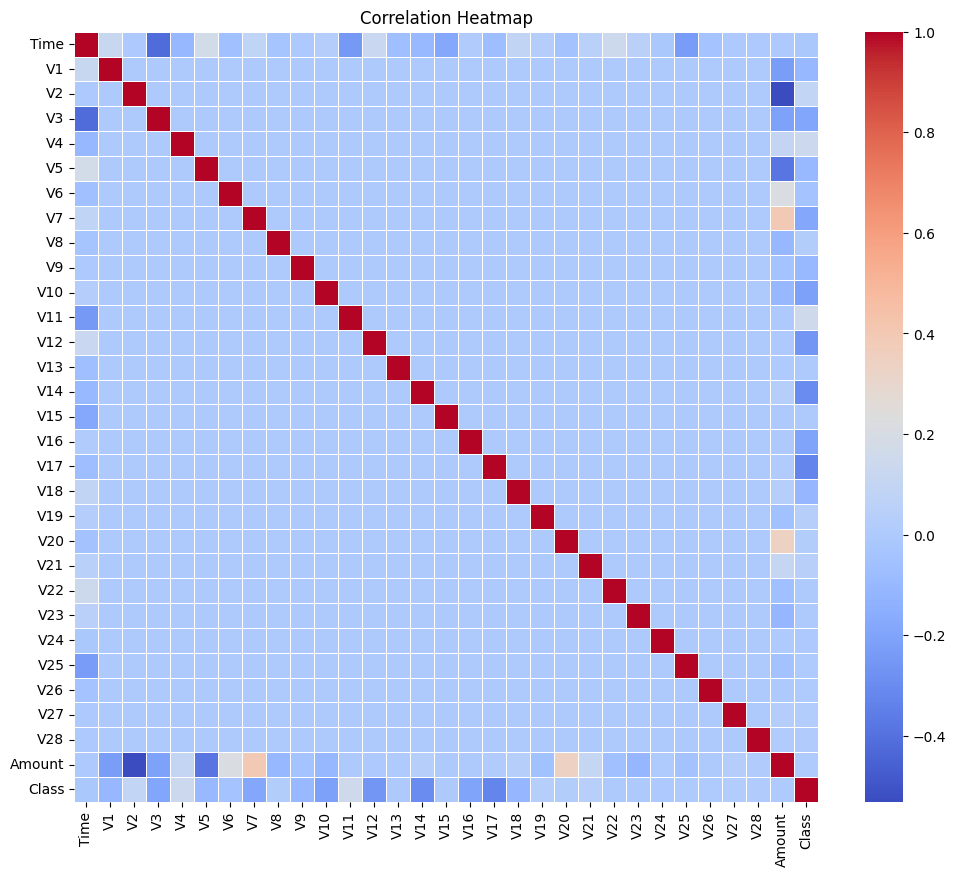

In [20]:
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Imbalances or Patterns

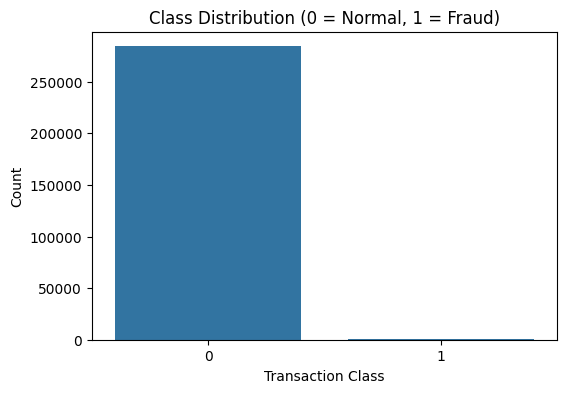

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.xlabel('Transaction Class')
plt.ylabel('Count')
plt.show()

In [22]:
class_counts = data['Class'].value_counts()
print(class_counts)

print("Percentage of Class Distribution :")
print(class_counts / len(data) * 100)

Class
0    284315
1       492
Name: count, dtype: int64
Percentage of Class Distribution :
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


# Preprocessing

In [23]:
df_data= data.copy()

In [24]:
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### MinMax Scaler

In [25]:
# Initialize the MinMaxScaler
MmScaler = MinMaxScaler()

# Scale 'Amount' and 'Time'
df_data[['Time', 'Amount']] = MmScaler.fit_transform(df_data[['Time', 'Amount']])

In [26]:
df_data[['Amount', 'Time']].head()

,Amount,Time
0,0.005824,0.000000
1,0.000105,0.000000
2,0.014739,0.000006
3,0.004807,0.000006
4,0.002724,0.000012


In [27]:
df_data[['Amount', 'Time']].describe()

,Amount,Time
count,284807.000000,284807.000000
mean,0.003439,0.548717
std,0.009736,0.274828
min,0.000000,0.000000
25%,0.000218,0.313681
50%,0.000856,0.490138
75%,0.003004,0.806290
max,1.000000,1.000000


## Apply dimensionality reduction

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_data.drop('Class', axis=1))

### Visualize

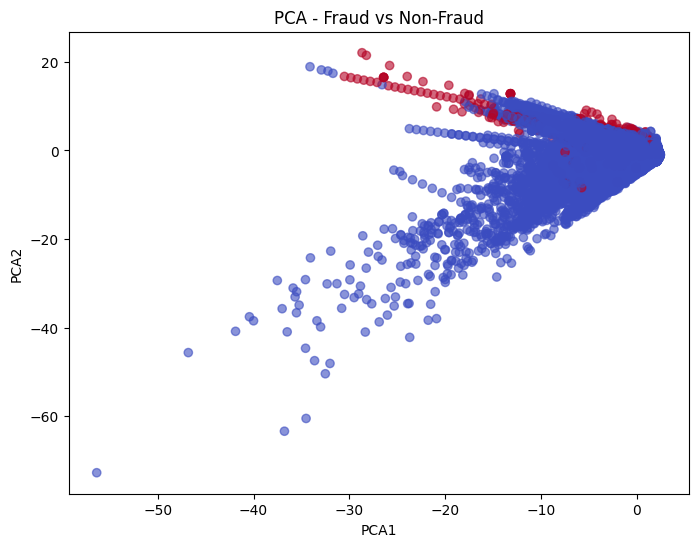

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df_data['Class'], cmap='coolwarm', alpha=0.6)
plt.title("PCA - Fraud vs Non-Fraud")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

# Unsupervised Techniques

##  Isolation Forest 

### This code begins by making a copy of the original dataset to preserve the raw data. It then extracts the true class labels (Class), which indicate whether each transaction is fraudulent or not, and calculates the fraud ratio — the proportion of fraud cases in the dataset. This ratio is used as the contamination parameter to initialize the Isolation Forest model, helping it understand the expected fraction of anomalies. The model is then trained (fit) on the copied dataset, and predictions are made where the model flags each transaction as either normal or anomalous.

In [30]:
df_M_data = df_data.copy()

In [31]:
true_labels = df_M_data['Class']

In [32]:
fraud_ratio = true_labels.mean()
print(f"Fraud Ratio in data: {fraud_ratio:.6f}")

Fraud Ratio in data: 0.001727


In [33]:
iso_model = IsolationForest(
    n_estimators=100,        
    contamination=fraud_ratio,
    max_samples='auto',      
    random_state=42          
)
iso_model.fit(df_M_data)

,n_estimators,100
,max_samples,'auto'
,contamination,np.float64(0....7485630620034)
,max_features,1.0
,bootstrap,False
,n_jobs,None
,random_state,42
,verbose,0
,warm_start,False


In [34]:
predict= iso_model.predict(df_M_data)
predict

array([1, 1, 1, ..., 1, 1, 1], shape=(284807,))

In [35]:
# Convert model predictions: -1 (anomaly) → 1 (fraud), 1 (normal) → 0 (non-fraud)
final_predictions=[1 if x == -1 else 0 for x in predict]
final_predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [36]:
# Add Final Predictions to dataset
df_M_data['Anomalies'] = final_predictions
df_M_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Anomalies
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,0,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,0,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,0,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,0,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,0,0


In [37]:
# Showing Anomalies
print(df_M_data['Anomalies'].value_counts())

Anomalies
0    284315
1       492
Name: count, dtype: int64


In [38]:
# Evaluate the model
print(confusion_matrix(true_labels, final_predictions))
print(classification_report(true_labels, final_predictions, digits=4))

[[283969    346]
 [   346    146]]
              precision    recall  f1-score   support

           0     0.9988    0.9988    0.9988    284315
           1     0.2967    0.2967    0.2967       492

    accuracy                         0.9976    284807
   macro avg     0.6478    0.6478    0.6478    284807
weighted avg     0.9976    0.9976    0.9976    284807



##  One-Class SVM

In [39]:
#  Initialize the one-class SVM Model
svm_model = OneClassSVM(
    kernel='rbf',  
    gamma=0.01,    
    nu=0.007,    
)

In [41]:
svm_model.fit(df_M_data)

raw_svm_predictions = svm_model.predict(df_M_data)

In [42]:
svm_anomaly_scores = np.where(raw_svm_predictions == -1, 1, 0)

In [43]:
svm_results_df = df_M_data.copy()
svm_results_df['Anomaly'] = svm_anomaly_scores

print(svm_results_df['Anomaly'].value_counts())

Anomaly
0    282807
1      2000
Name: count, dtype: int64


In [44]:
#  Evaluate if you have true labels
print(confusion_matrix(true_labels, svm_anomaly_scores))
print(classification_report(true_labels, svm_anomaly_scores, digits=4))

[[282585   1730]
 [   222    270]]
              precision    recall  f1-score   support

           0     0.9992    0.9939    0.9966    284315
           1     0.1350    0.5488    0.2167       492

    accuracy                         0.9931    284807
   macro avg     0.5671    0.7713    0.6066    284807
weighted avg     0.9977    0.9931    0.9952    284807



# Final Result Summary

In [45]:
# Final results summary table based on models results
results_summary = pd.DataFrame({
    'Model': ['Isolation Forest', 'One-Class SVM'],
    'Precision': [0.2967, 0.1348],
    'Recall':    [0.2967, 0.5467],
    'F1-Score':  [0.2967, 0.2163],
    'Accuracy':  [0.9976, 0.9932],
})
print(results_summary)


              Model  Precision  Recall  F1-Score  Accuracy
0  Isolation Forest     0.2967  0.2967    0.2967    0.9976
1     One-Class SVM     0.1348  0.5467    0.2163    0.9932
